In [34]:
from matplotlib.image import *
from matplotlib.pyplot import *
import math as mt
import numpy as np
from PIL import Image

In [35]:
img=imread(r"C:\Users\DUCS-33\Desktop\New folder\DIP-master\img.jpg")

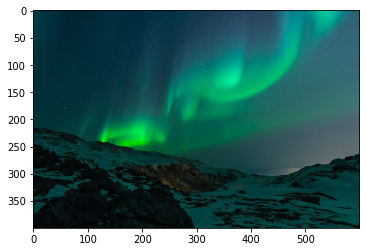

In [36]:
imshow(img)

In [37]:
count=[0]*256

(400, 600)


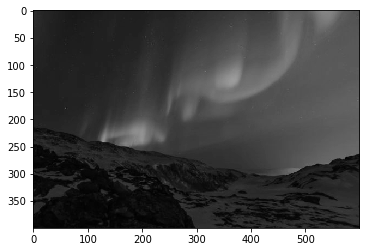

In [38]:
#import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

temp=[]
intensityFrequency = [0.0]*256
def histogramEqualization(image):
    #Objective: Display Intensity Histogram for an Image
    #Input: Original Image
    #Output: Return Equalized Image
    global temp
    for i in range(image.shape[0]):
        temp2=0
        temp3=[]
        for j in range(image.shape[1]):
            temp2=image[i][j][0]*0.3+image[i][j][1]*0.59+image[i][j][2]*0.11
            #if temp2>0:
            temp2=math.floor(temp2)
            temp3.append(temp2)
        temp.append(list(temp3))
    temp=np.array(temp)
    #imshow(temp)
    imshow(temp, cmap='gray', vmin=0, vmax=255)
    print(temp.shape)
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #Converting Image to Gray Scale
    global intensityFrequency
    height = image.shape[0]
    width = image.shape[1]
    no_of_pixels = height*width
    
    #Finding the Frequency of each Intensity Level in an Image
    for i in range(0, height):
        for j in range(0, width):
            intensityFrequency[temp[i, j]] += 1.0
    global count
    count=list(intensityFrequency)
    #Probability of each Intensity Level
    for i in range(0,255):
        intensityFrequency[i] = intensityFrequency[i]/no_of_pixels
        
    #Mapping of Intensity Level to the Corresponding Resultant Intensity Level
    #Resultant Intensity Level = floor(Cumulative Frequency of an Intensity Level * (Maximum Level - 1) + 0.5)
    cumulativeIntensityFrequency = 0.0
    mappingIntensityLevel = [0]*256
    for i in range(0,255):
        cumulativeIntensityFrequency += intensityFrequency[i]
        mappingIntensityLevel[i] = math.floor(cumulativeIntensityFrequency * 255 + 0.5)
        
    #Creating a Resultant Image
    #Mapping Original Intensity Level with the Resultant Intensity Level
    resultant_image = temp
    for i in range(0, height):
        for j in range(0, width):
            resultant_image[i ,j] = mappingIntensityLevel[temp[i, j]]
    
    return resultant_image
    

output = histogramEqualization(img)

#imshow(output)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

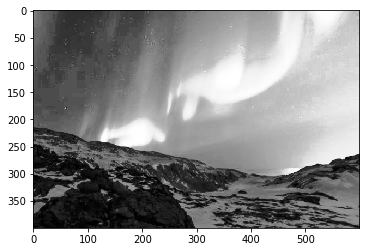

In [39]:
imshow(output, cmap='gray', vmin=0, vmax=255)
#imshow(output)


<BarContainer object of 256 artists>

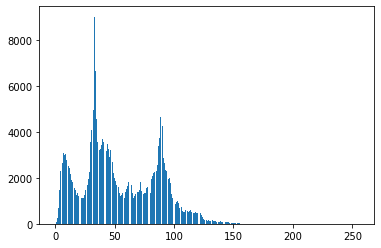

In [40]:
count=np.array(count).astype(int)
bar(range(256),count)

In [42]:
ocount=[0]*256

<BarContainer object of 256 artists>

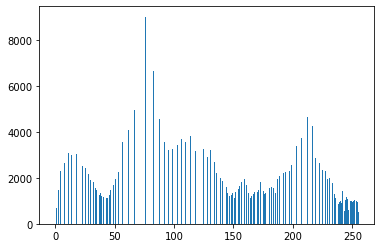

In [43]:
for i in output:
    for j in i:
        ocount[j]+=1
bar(range(256),ocount)